In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns
from pytrends.request import TrendReq

* Setup pytrend library and keyword define.

In [3]:
pytrends=TrendReq(hl='en-US', tz=360)
keyword="cloud computing"

* Data Request.

*1 First, write a code where, by changing just the keyword, we can search for multiple things

In [4]:
pytrends.build_payload([keyword],cat=0,timeframe='today 12-m',geo='',gprop='')

* 2. Top 15 countries where the keywords are searched the most, and also create visual representation of it.

In [6]:
#country wise interest
region_data=pytrends.interest_by_region()
region_data=region_data.sort_values(by=keyword,ascending=False).head(15)


C:\Users\shiva\AppData\Local\Temp\ipykernel_12260\2045039784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data[keyword],y=region_data.index,palette="Blues_d")


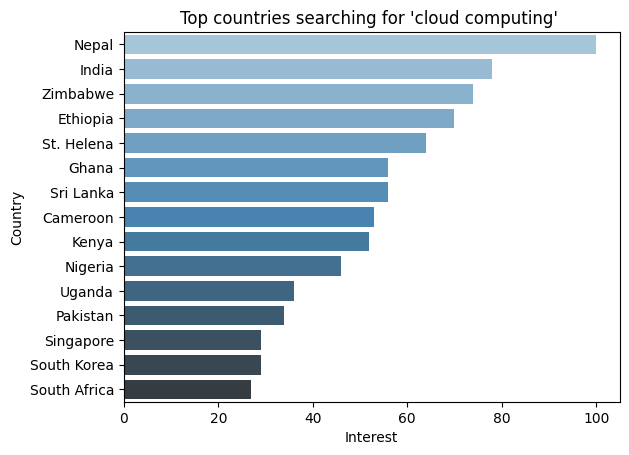

In [9]:
plt.Figure(figsize=(10,6))
sns.barplot(x=region_data[keyword],y=region_data.index,palette="Blues_d")
plt.title(f"Top countries searching for '{keyword}' ")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

*  3) A world map needs to be plotted showing the countries that search the keyword the most

In [11]:
region_data=region_data.reset_index()
fig=px.choropleth(region_data,
                  locations='geoName',
                  locationmode='country names',
                  color=keyword,
                  title=f"Search Interest for '{keyword}' by Country ",
          color_continuous_scale='Blues')
fig.show()

 * 4) We need to extract the time-wise interest of the keyword — how it trended in different years.

In [13]:
time_df=pytrends.interest_over_time()

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



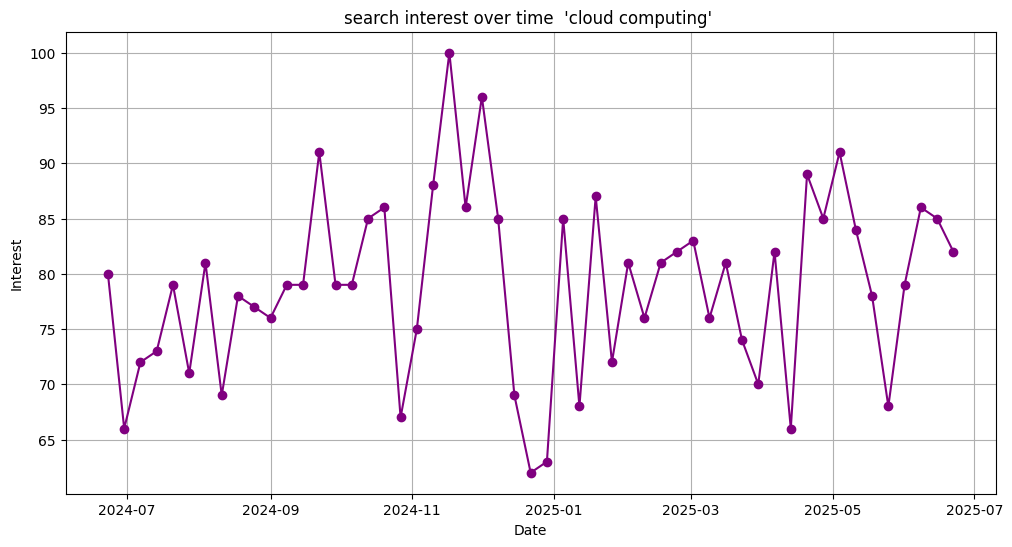

In [15]:
#time-wise interest 
plt.figure(figsize=(12,6))
plt.plot(time_df.index,time_df[keyword],marker='o',color='purple')
plt.title(f"search interest over time  '{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

* 5) Compare related keywords and plot the graph.

In [16]:
kw_list=["cloud computing", "data science", "machine learning"]
pytrends.build_payload(kw_list,cat=0, timeframe="today 12-m",geo='',gprop="")

C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



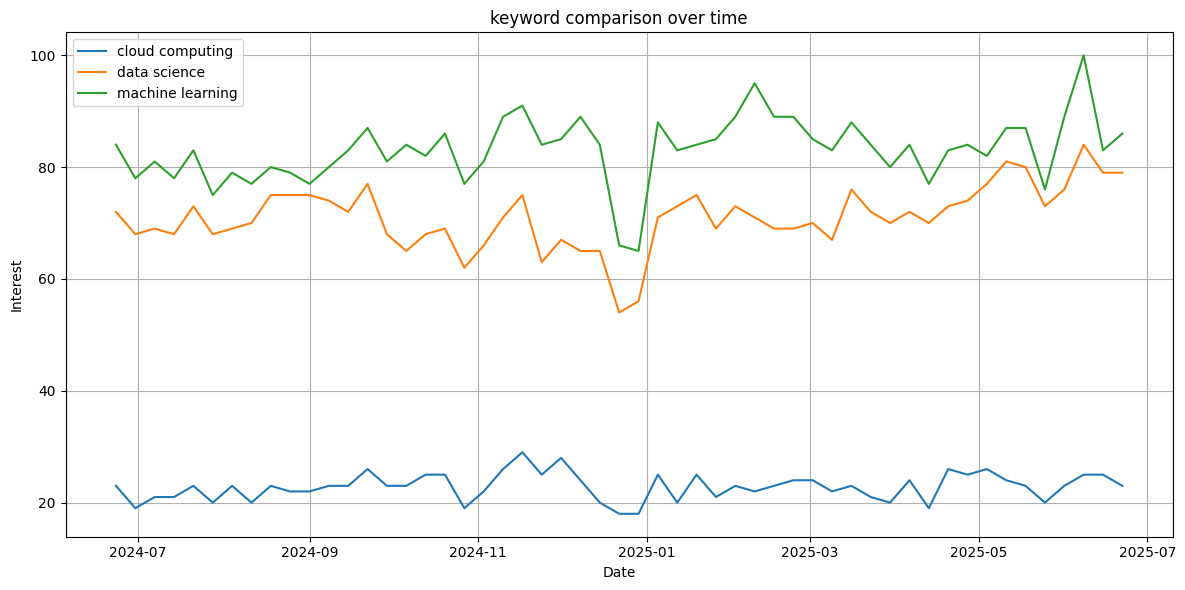

In [17]:
compare_df=pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index,compare_df[kw],label=kw) 

plt.title("keyword comparison over time")
plt.xlabel("Date")    
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()     